In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import array

import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [2]:
ri2 = np.load('data/ri/ri2.npy')

rim2 = np.mean(ri2, axis=1)

ri3 = np.load('data/ri/ri3.npy')

rim3 = np.mean(ri3, axis=1)

ri4 = np.load('data/ri/ri4.npy')

rim4 = np.mean(ri4, axis=1)

In [3]:
np.mean(np.hstack((ri2,ri3,ri4)))

0.23864023013004365

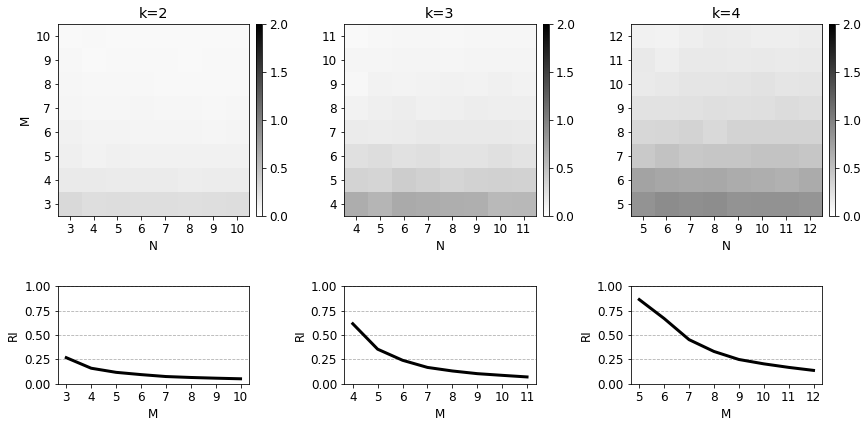

In [4]:
fig, ax = plt.subplots(2,3,figsize=(12,6), gridspec_kw={'height_ratios': [3, 1]})

im2 = ax[0,0].imshow(ri2, cmap='binary', vmin=0, vmax=2, origin='lower')
ax[0,0].set_title('k=2');
im3 = ax[0,1].imshow(ri3, cmap='binary', vmin=0, vmax=2, origin='lower')
ax[0,1].set_title('k=3');
im4 = ax[0,2].imshow(ri4, cmap='binary', vmin=0, vmax=2, origin='lower')
ax[0,2].set_title('k=4');


iml = [im2,im3,im4]
tk = 3+np.arange(0,8)
for i in range(3):
    a = ax[0,i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(i+tk)
    a.set_yticklabels(i+tk);
    a.set_xlabel('N')
        
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);

ax[0,0].set_ylabel('M')
    

ax[1,0].plot(tk, np.mean(ri2, axis=1), color = 'k', lw=3)
ax[1,1].plot(tk+1, np.mean(ri3, axis=1), color = 'k', lw=3)
ax[1,2].plot(tk+2, np.mean(ri4, axis=1), color = 'k', lw=3)


for i in range(3):
    a = ax[1,i]
    a.set_ylim(0,1)
    a.set_xlabel('M')
    a.set_ylabel('RI')
    a.set_xticks(i+tk)
    a.set_xticklabels(i+tk)
    a.grid(axis='y', ls='--')
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    cax.set_visible(0)

plt.subplots_adjust(top=1.05, left=0.05, right=0.95, bottom=0.1, wspace=0.4, hspace=0.1)

In [5]:
fig.savefig('figures/all-data-3.jpg', dpi=150)